# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_style(style="dark")


#Matplotlib setup
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=10)         
plt.rc('axes', titlesize=10)    
plt.rc('axes', labelsize=10)    
plt.rc('legend', fontsize=10)   
plt.rc('figure', titlesize=15) 

## Loading dataset 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']
...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed']
11214,ecf251d4_0,3058.072895,end,NaN
11215,ecf251d4_0,3068.280519,start,NaN
11216,ecf251d4_0,3069.547000,throwin,['pass']


## Generate an unique id per event interval

In [4]:
df['video_id'].value_counts()

1606b0e6_1    1249
35bd9041_0    1075
3c993bd2_0    1042
1606b0e6_0    1000
ecf251d4_0     980
3c993bd2_1     966
35bd9041_1     933
407c5a9e_1     858
cfbe2e94_0     823
4ffd5986_0     792
cfbe2e94_1     763
9a97dae4_1     737
Name: video_id, dtype: int64

**Conclusion:** Some events were not recorded for some games. We can see that there is a difference in terms of amount of event per video

In [5]:
df['event_index'] = 0

event_idx = 0

for i in range(len(df)):
    if df['event'].iloc[i] != 'start':
        df['event_index'].iloc[i] = event_idx
    else: 
        event_idx += 1
        df['event_index'].iloc[i] = event_idx

In [6]:
df

,video_id,time,event,event_attributes,event_index
0,1606b0e6_0,200.265822,start,NaN,1
1,1606b0e6_0,201.150000,challenge,['ball_action_forced'],1
2,1606b0e6_0,202.765822,end,NaN,1
3,1606b0e6_0,210.124111,start,NaN,2
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed'],2
...,...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed'],3417
11214,ecf251d4_0,3058.072895,end,NaN,3417
11215,ecf251d4_0,3068.280519,start,NaN,3418
11216,ecf251d4_0,3069.547000,throwin,['pass'],3418


## Create unique video ids

In [7]:
df['unique_video_id'] = df['video_id'].astype(str).str[:-2]

In [8]:
df.sample(1)

,video_id,time,event,event_attributes,event_index,unique_video_id
6378,407c5a9e_1,812.817589,start,NaN,1934,407c5a9e


## Create a get dummies for all events

In [9]:
dummies = pd.get_dummies(df['event'], columns=['play', 'start', 'challenge', 'end'])

In [10]:
df_with_dummies = pd.concat([df[['video_id', 'event_attributes', 'event_index', 'time']], dummies], axis=1)

In [11]:
df_with_dummies

,video_id,event_attributes,event_index,time,challenge,end,play,start,throwin
0,1606b0e6_0,NaN,1,200.265822,0,0,0,1,0
1,1606b0e6_0,['ball_action_forced'],1,201.150000,1,0,0,0,0
2,1606b0e6_0,NaN,1,202.765822,0,1,0,0,0
3,1606b0e6_0,NaN,2,210.124111,0,0,0,1,0
4,1606b0e6_0,['opponent_dispossessed'],2,210.870000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11213,ecf251d4_0,['opponent_dispossessed'],3417,3056.587000,1,0,0,0,0
11214,ecf251d4_0,NaN,3417,3058.072895,0,1,0,0,0
11215,ecf251d4_0,NaN,3418,3068.280519,0,0,0,1,0
11216,ecf251d4_0,['pass'],3418,3069.547000,0,0,0,0,1


## Replacing manually dummy values with time

In [12]:
for i in range(len(df_with_dummies)):
    if df_with_dummies['challenge'].iloc[i] == 1:
        df_with_dummies['challenge'].iloc[i] = df_with_dummies['time'].iloc[i]
        

for i in range(len(df_with_dummies)):
    if df_with_dummies['end'].iloc[i] == 1:
        df_with_dummies['end'].iloc[i] = df_with_dummies['time'].iloc[i]
        
        
for i in range(len(df_with_dummies)):
    if df_with_dummies['play'].iloc[i] == 1:
        df_with_dummies['play'].iloc[i] = df_with_dummies['time'].iloc[i]
        
        
for i in range(len(df_with_dummies)):
    if df_with_dummies['start'].iloc[i] == 1:
        df_with_dummies['start'].iloc[i] = df_with_dummies['time'].iloc[i]
        

for i in range(len(df_with_dummies)):
    if df_with_dummies['throwin'].iloc[i] == 1:
        df_with_dummies['throwin'].iloc[i] = df_with_dummies['time'].iloc[i]

In [13]:
df_with_dummies

,video_id,event_attributes,event_index,time,challenge,end,play,start,throwin
0,1606b0e6_0,NaN,1,200.265822,0.000,0.000000,0.0,200.265822,0.000
1,1606b0e6_0,['ball_action_forced'],1,201.150000,201.150,0.000000,0.0,0.000000,0.000
2,1606b0e6_0,NaN,1,202.765822,0.000,202.765822,0.0,0.000000,0.000
3,1606b0e6_0,NaN,2,210.124111,0.000,0.000000,0.0,210.124111,0.000
4,1606b0e6_0,['opponent_dispossessed'],2,210.870000,210.870,0.000000,0.0,0.000000,0.000
...,...,...,...,...,...,...,...,...,...
11213,ecf251d4_0,['opponent_dispossessed'],3417,3056.587000,3056.587,0.000000,0.0,0.000000,0.000
11214,ecf251d4_0,NaN,3417,3058.072895,0.000,3058.072895,0.0,0.000000,0.000
11215,ecf251d4_0,NaN,3418,3068.280519,0.000,0.000000,0.0,3068.280519,0.000
11216,ecf251d4_0,['pass'],3418,3069.547000,0.000,0.000000,0.0,0.000000,3069.547


## Replacing 0 by nan

In [14]:
df_with_dummies.replace(0, np.nan, inplace=True)

In [15]:
df_with_dummies

,video_id,event_attributes,event_index,time,challenge,end,play,start,throwin
0,1606b0e6_0,NaN,1,200.265822,NaN,NaN,NaN,200.265822,NaN
1,1606b0e6_0,['ball_action_forced'],1,201.150000,201.150,NaN,NaN,NaN,NaN
2,1606b0e6_0,NaN,1,202.765822,NaN,202.765822,NaN,NaN,NaN
3,1606b0e6_0,NaN,2,210.124111,NaN,NaN,NaN,210.124111,NaN
4,1606b0e6_0,['opponent_dispossessed'],2,210.870000,210.870,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11213,ecf251d4_0,['opponent_dispossessed'],3417,3056.587000,3056.587,NaN,NaN,NaN,NaN
11214,ecf251d4_0,NaN,3417,3058.072895,NaN,3058.072895,NaN,NaN,NaN
11215,ecf251d4_0,NaN,3418,3068.280519,NaN,NaN,NaN,3068.280519,NaN
11216,ecf251d4_0,['pass'],3418,3069.547000,NaN,NaN,NaN,NaN,3069.547


## Groupby the dataset by interval

Calculating mean value in order to solve multi-event issues for the same interval

In [16]:
df_with_dummies_gp = df_with_dummies.groupby(['event_index']).mean()

In [17]:
df_with_dummies_gp

,time,challenge,end,play,start,throwin
event_index,,,,,,
1,201.393881,201.150,202.765822,NaN,200.265822,NaN
2,211.206074,210.870,212.624111,NaN,210.124111,NaN
3,219.143475,NaN,220.350213,NaN,217.850213,219.230
4,224.930567,NaN,226.430850,224.430,223.930850,NaN
5,229.933578,NaN,231.455367,229.390,228.955367,NaN
...,...,...,...,...,...,...
3414,3032.151216,NaN,3033.183323,3032.587,3030.683323,NaN
3415,3041.700016,NaN,3043.126523,3041.347,3040.626523,NaN
3416,3051.663976,NaN,3053.744023,3051.707,3049.497881,NaN


# Global Stats

## Event_attributes by Event

In [18]:
event_event_attributes = pd.DataFrame(df.groupby(['event', 'event_attributes']).size(), columns=['count'])
event_event_attributes['%'] = round(event_event_attributes['count']/event_event_attributes['count'].sum(),2)
event_event_attributes

count     %
event     event_attributes                               
challenge ['ball_action_forced']                239  0.05
          ['challenge_during_ball_transfer']     53  0.01
          ['fouled']                            111  0.03
          ['opponent_dispossessed']             138  0.03
          ['opponent_rounded']                   39  0.01
          ['possession_retained']                44  0.01
play      ['cross', 'corner']                    33  0.01
          ['cross', 'freekick']                   5  0.00
          ['cross', 'openplay']                  80  0.02
          ['pass', 'corner']                      4  0.00
          ['pass', 'freekick']                  127  0.03
          ['pass', 'openplay']                 3337  0.76
throwin   ['cross']                              18  0.00
          ['pass']                              154  0.04

**Conclusion:** The feature event attributes is unbalanced : ['pass', 'openplay']	3337

## Event

In [19]:
event_stats = pd.DataFrame(df['event'].value_counts())
event_stats['%'] = round(event_stats['event']/event_stats.event.sum(),2)
event_stats['avg_per_game'] = event_stats['event']/df['unique_video_id'].nunique()

In [20]:
event_stats

,event,%,avg_per_game
play,3586,0.32,448.25
start,3418,0.30,427.25
end,3418,0.30,427.25
challenge,624,0.06,78.00
throwin,172,0.02,21.50


**Conclusion:** The target is unbalanced: play is highly dominant compared to challenge and throwin.

## Event_attributes

In [21]:
df_event_attributes = pd.DataFrame(df['event_attributes'].value_counts())
df_event_attributes['%'] = round(df_event_attributes['event_attributes']/df_event_attributes.event_attributes.sum(),2)
df_event_attributes['avg_per_game'] = round(df_event_attributes['event_attributes']/df['unique_video_id'].nunique())
df_event_attributes

,event_attributes,%,avg_per_game
"['pass', 'openplay']",3337,0.76,417.0
['ball_action_forced'],239,0.05,30.0
['pass'],154,0.04,19.0
['opponent_dispossessed'],138,0.03,17.0
"['pass', 'freekick']",127,0.03,16.0
['fouled'],111,0.03,14.0
"['cross', 'openplay']",80,0.02,10.0
['challenge_during_ball_transfer'],53,0.01,7.0
['possession_retained'],44,0.01,6.0
['opponent_rounded'],39,0.01,5.0


# Visualization

## Event

### Total event distribution

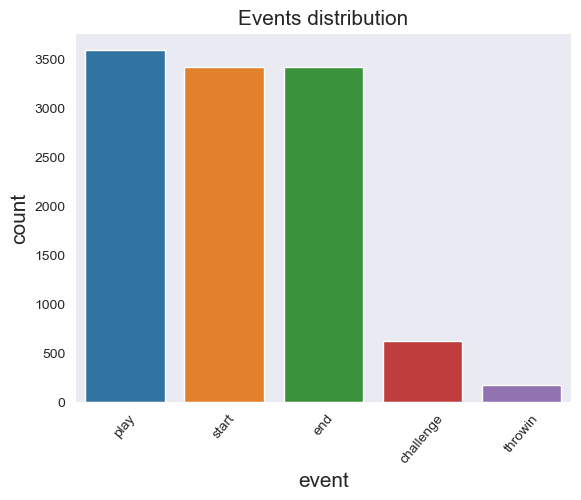

<Figure size 1500x500 with 0 Axes>

In [22]:
plt.title('Events distribution', fontsize=15)
sns.countplot(data=df, x='event', order = df['event'].value_counts().index)
plt.xticks(rotation=50)
plt.xlabel('event', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.figure(figsize=(15, 5))  
plt.show()

### Event distribution per video

In [23]:
event_dist = df.copy()

In [24]:
event_dist = event_dist[(event_dist['event'] != 'start') | (event_dist['event'] != 'end')]
event_dist = event_dist.dropna(how='any')


In [25]:
event_dist = pd.crosstab(event_dist['video_id'], event_dist['event'])


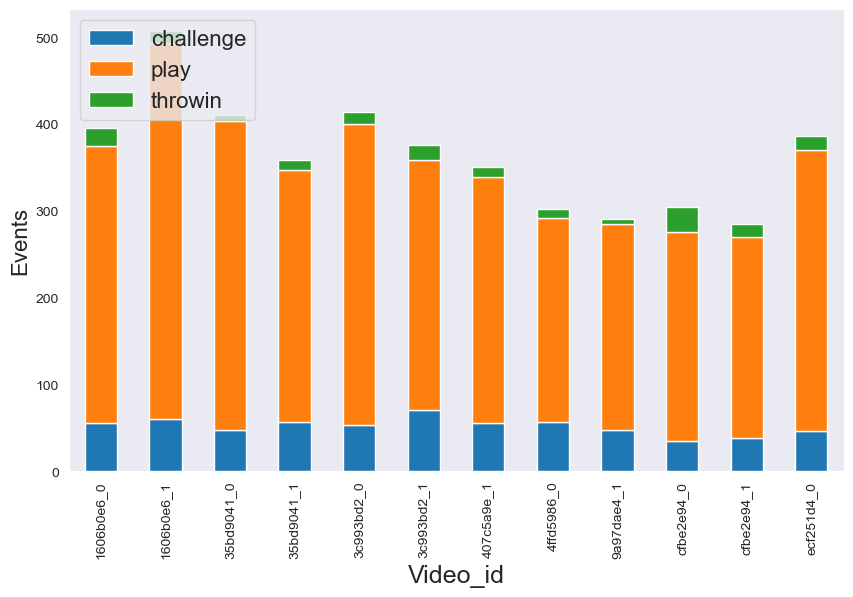

In [26]:
#event_distribution = df.drop(['end'], axis=1)
event_dist.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))
plt.legend(loc="upper left", ncol=5)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.xlabel("Video_id")
plt.ylabel("Events")
plt.legend(loc=2, prop={'size': 16})
plt.show()

In [27]:
event_dist['total'] = event_dist['challenge'] + event_dist['play'] + event_dist['throwin']
event_dist['% challenge'] = round(event_dist['challenge']/event_dist['total'],2)
event_dist['% play'] = round(event_dist['play']/event_dist['total'],2)
event_dist['% throwin'] = round(event_dist['throwin']/event_dist['total'],2)

In [28]:
event_dist

event,challenge,play,throwin,total,% challenge,% play,% throwin
video_id,,,,,,,
1606b0e6_0,56,319,21,396,0.14,0.81,0.05
1606b0e6_1,60,434,13,507,0.12,0.86,0.03
35bd9041_0,48,355,8,411,0.12,0.86,0.02
35bd9041_1,57,290,12,359,0.16,0.81,0.03
3c993bd2_0,53,347,14,414,0.13,0.84,0.03
3c993bd2_1,70,289,17,376,0.19,0.77,0.05
407c5a9e_1,56,283,11,350,0.16,0.81,0.03
4ffd5986_0,57,235,10,302,0.19,0.78,0.03
9a97dae4_1,48,237,6,291,0.16,0.81,0.02


**Conclusion:** Event distribution per game looks almost all the same 

## Games overview

In [29]:
new_df = df.copy()

In [30]:
new_df['time_in_min'] = (new_df['time']/60).astype(int)
new_df_gd = pd.get_dummies(new_df['event'], columns=['play', 'start', 'challenge', 'end'])
new_df_all = pd.concat([new_df, new_df_gd],  axis= 1) 

In [31]:
unique_game = df['unique_video_id'].value_counts().index.to_list()

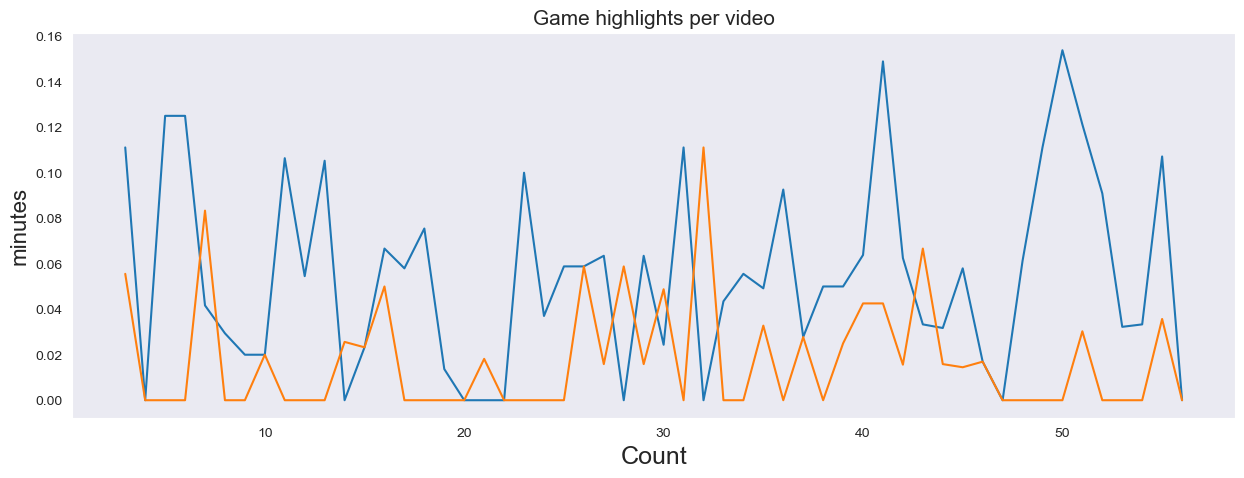

Game summary
Game ID: 1606b0e6
Number of play: 753
Number of challenge: 116
Number of throwin: 34
Total events: 903


Number of interval: 673
Interval using 2 or more events: 230


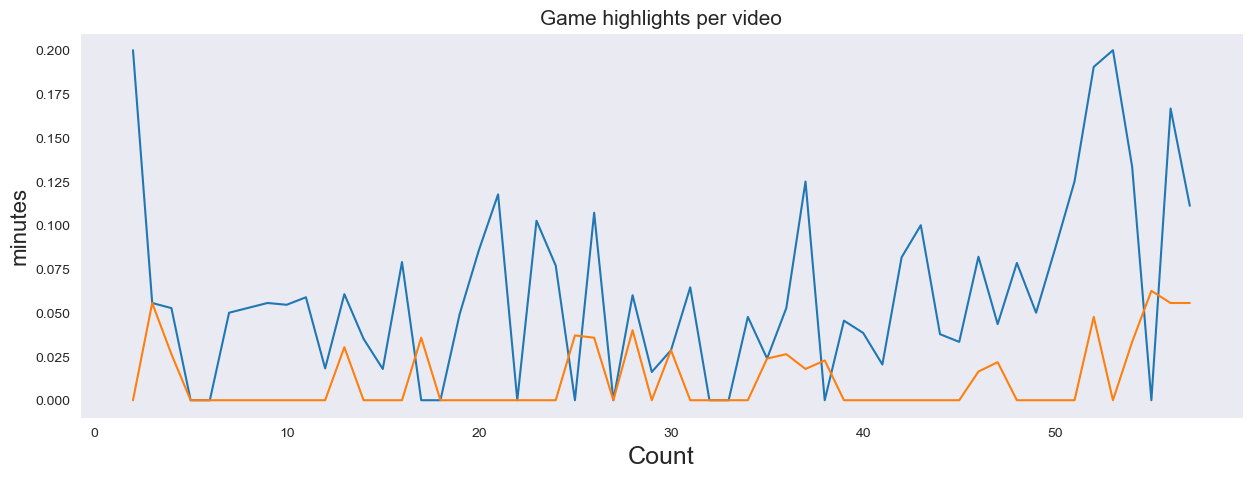

Game summary
Game ID: 35bd9041
Number of play: 645
Number of challenge: 105
Number of throwin: 20
Total events: 770


Number of interval: 619
Interval using 2 or more events: 151


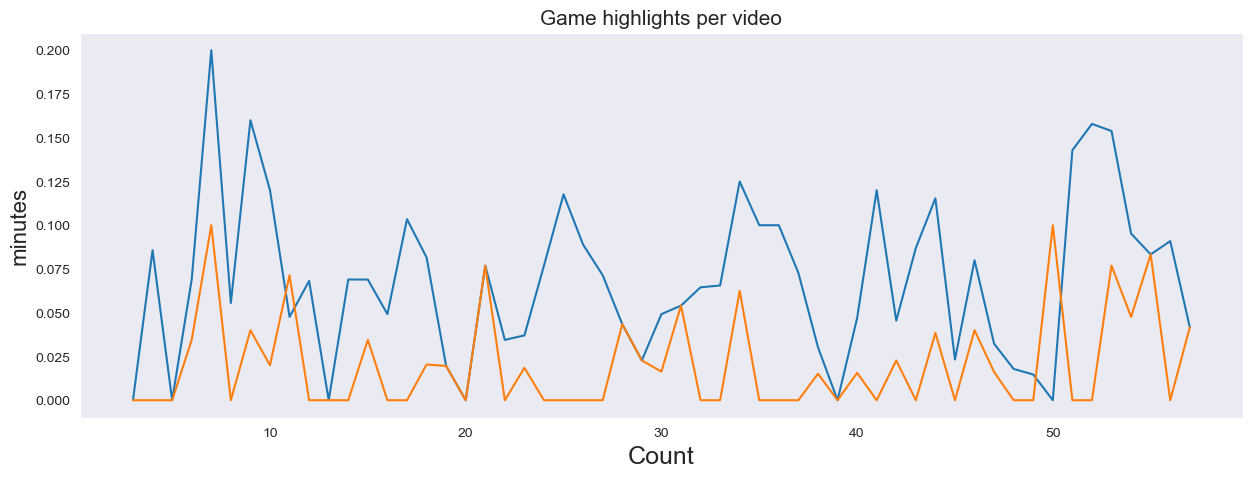

Game summary
Game ID: 3c993bd2
Number of play: 636
Number of challenge: 123
Number of throwin: 31
Total events: 790


Number of interval: 609
Interval using 2 or more events: 181


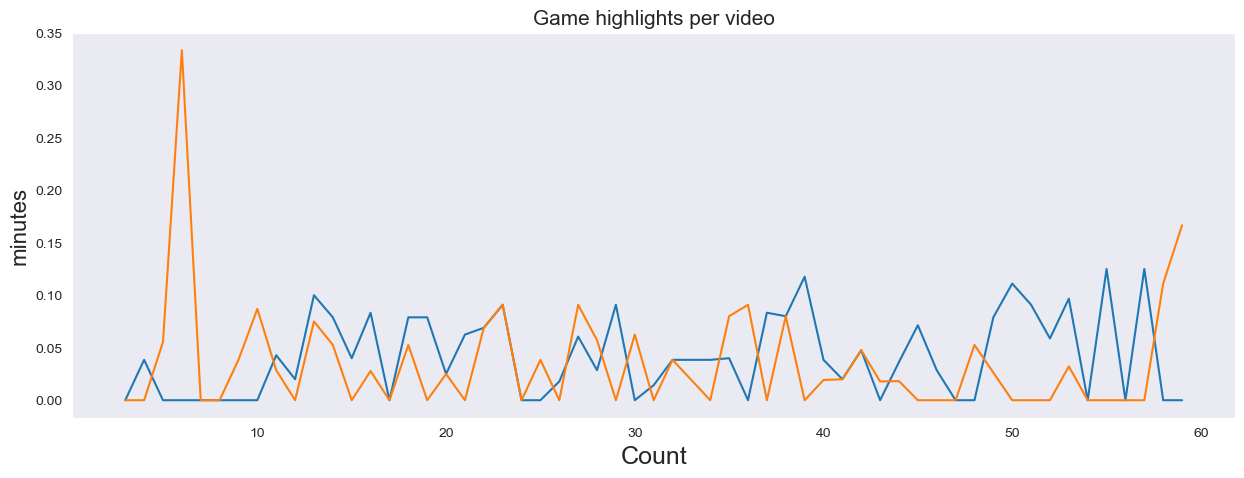

Game summary
Game ID: cfbe2e94
Number of play: 473
Number of challenge: 73
Number of throwin: 44
Total events: 590


Number of interval: 498
Interval using 2 or more events: 92


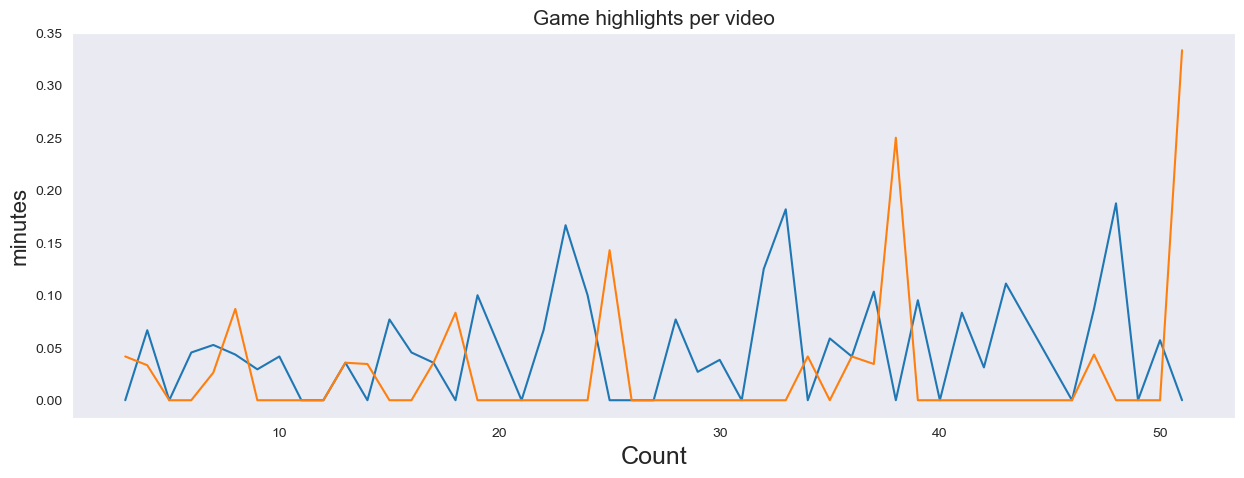

Game summary
Game ID: ecf251d4
Number of play: 324
Number of challenge: 46
Number of throwin: 16
Total events: 386


Number of interval: 297
Interval using 2 or more events: 89


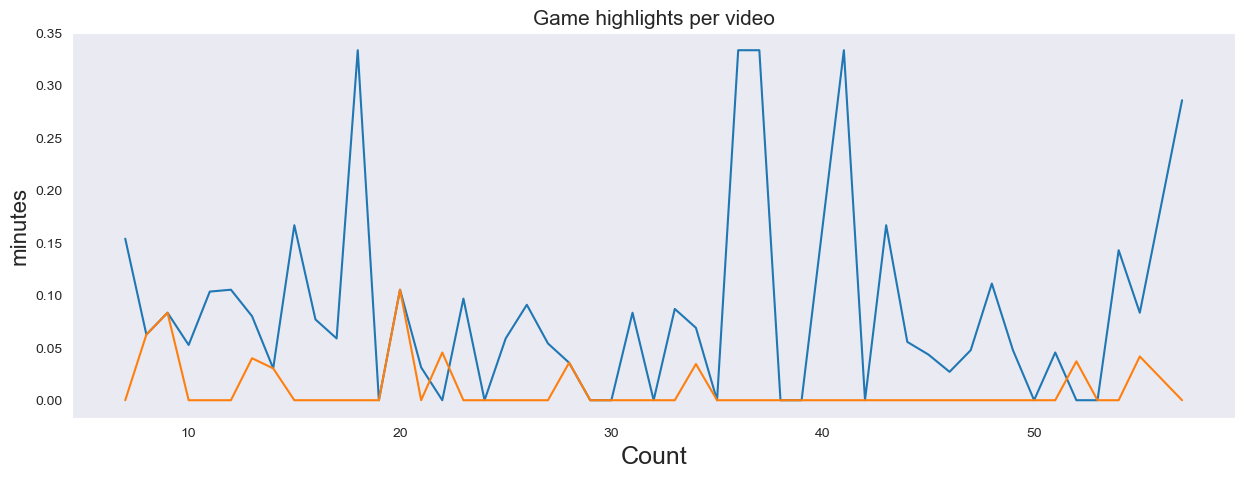

Game summary
Game ID: 407c5a9e
Number of play: 283
Number of challenge: 56
Number of throwin: 11
Total events: 350


Number of interval: 254
Interval using 2 or more events: 96


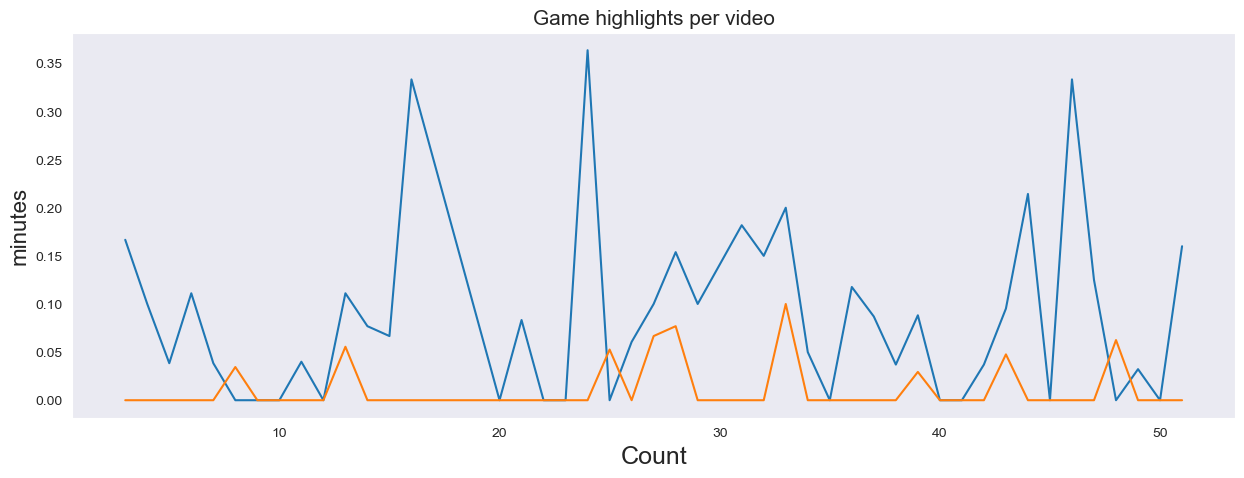

Game summary
Game ID: 4ffd5986
Number of play: 235
Number of challenge: 57
Number of throwin: 10
Total events: 302


Number of interval: 245
Interval using 2 or more events: 57


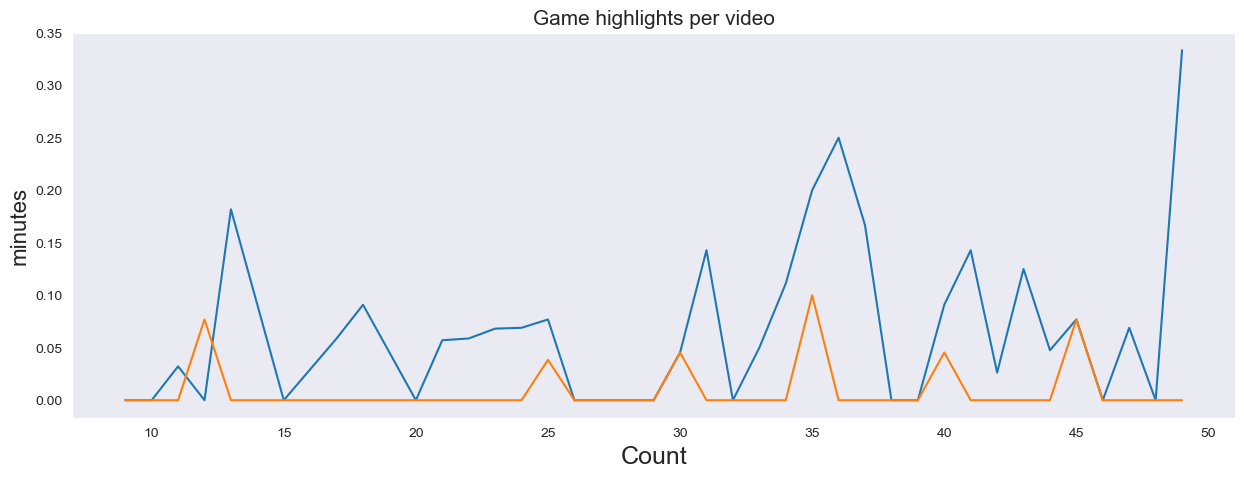

Game summary
Game ID: 9a97dae4
Number of play: 237
Number of challenge: 48
Number of throwin: 6
Total events: 291


Number of interval: 223
Interval using 2 or more events: 68


In [32]:
for game in unique_game:
    plt.figure(figsize=(15, 5)) 
    plt.title('Game highlights per video', fontsize = 15)
    test_time_serie = new_df_all[new_df_all['unique_video_id'] == game]
    sns.lineplot(x = "time_in_min", y = "challenge", data = test_time_serie, errorbar=None)
    sns.lineplot(x = "time_in_min", y = "throwin", data = test_time_serie, errorbar=None)
    plt.xlabel('Count', fontsize=18)
    plt.ylabel('minutes', fontsize=16)
    
    play = test_time_serie['play'].value_counts()[1]
    challenge = test_time_serie['challenge'].value_counts()[1]
    throwin = test_time_serie['throwin'].value_counts()[1]
    total = play + challenge + throwin
    
    start = test_time_serie['start'].value_counts()[1]
    end = test_time_serie['end'].value_counts()[1]
    
    plt.show()
    print("Game summary")
    print(f"Game ID: {game}")
    print(f"Number of play: {play}")
    print(f"Number of challenge: {challenge}")
    print(f"Number of throwin: {throwin}")
    print(f"Total events: {total}")
    print("\n")
    
    assert start == end
    print(f"Number of interval: {start}")
    print(f"Interval using 2 or more events: {total - start}")
    

**Conclusion:** We can notice that an interval could contain several events

## Event_attributes

### Total distribution

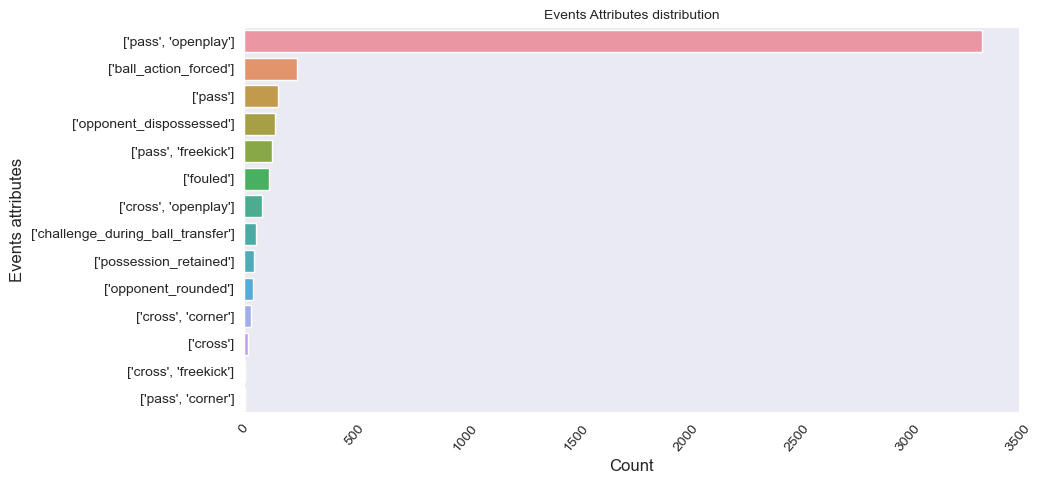

In [33]:
plt.figure(figsize=(10, 5))  
plt.title('Events Attributes distribution')
sns.countplot(data=df, y='event_attributes', order = df['event_attributes'].value_counts().index)
plt.xticks(rotation=50)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Events attributes', fontsize=12)
plt.show()

### EVENT: challenge

In [34]:
df_challenge = df[df["event"] == "challenge"].reset_index()

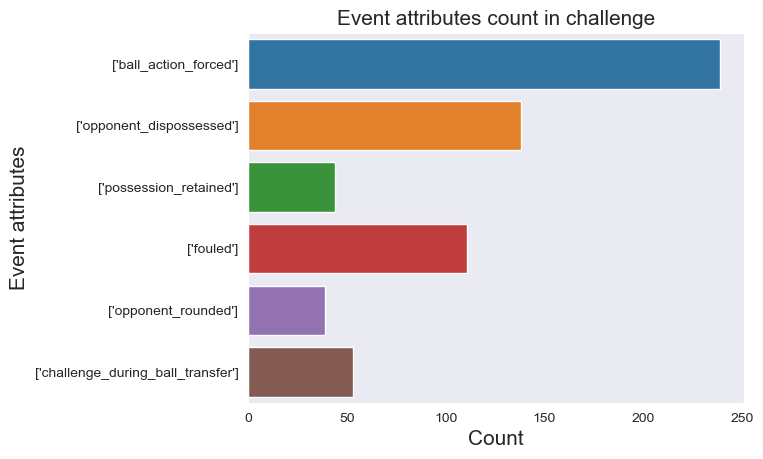

<Figure size 1600x800 with 0 Axes>

In [35]:
sns.countplot(data=df_challenge, y="event_attributes")
plt.title('Event attributes count in challenge', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Event attributes', fontsize=15)
plt.figure(figsize=(16, 8))
plt.show()



### EVENT: play

In [36]:
df_play = df[df["event"] == "play"].reset_index()

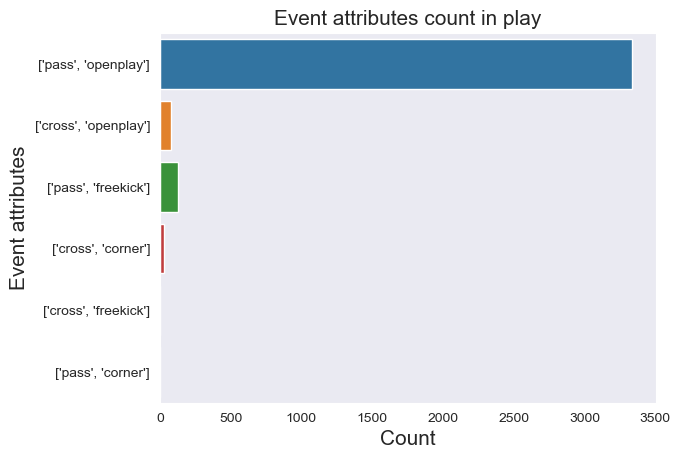

<Figure size 1600x800 with 0 Axes>

In [37]:
sns.countplot(data=df_play, y="event_attributes")
plt.title('Event attributes count in play', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Event attributes', fontsize=15)
plt.figure(figsize=(16, 8))
plt.show()


### EVENT: throwin

In [38]:
df_throwin = df[df["event"] == "throwin"].reset_index()

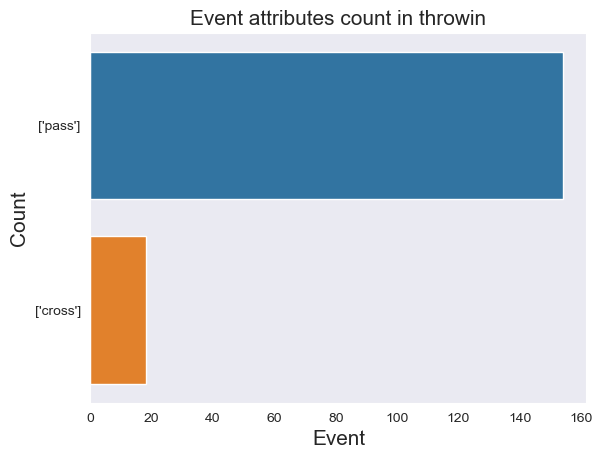

<Figure size 1600x500 with 0 Axes>

In [39]:
sns.countplot(data=df_throwin, y="event_attributes")
plt.title('Event attributes count in throwin', fontsize=15)
plt.xlabel('Event', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.figure(figsize=(16, 5))
plt.show()

## Target Distribution

In [40]:
events = ['play', 'challenge', 'throwin']

In [41]:
df['time_in_min'] = (df['time']/60).astype(int)

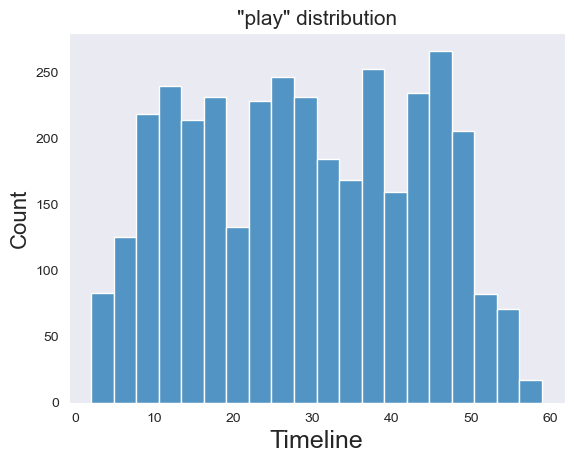

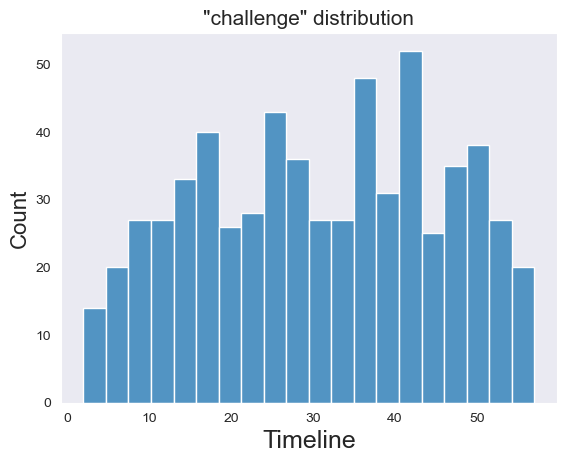

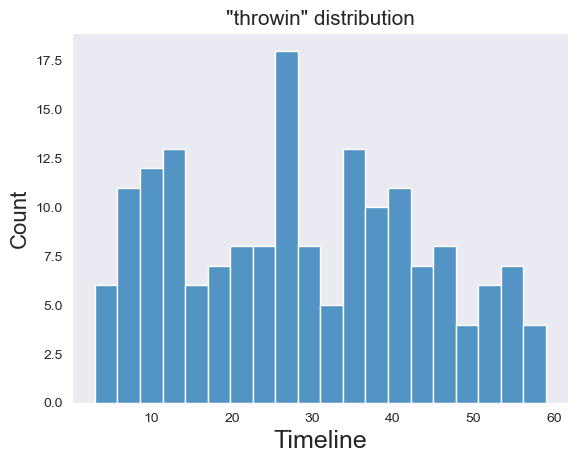

In [42]:
for event in events:
    plt.title(f'"{event}" distribution', fontsize=15)
    event_ = df[df['event'] == event]
    plt.xlabel('Timeline', fontsize=18)
    plt.ylabel('Count', fontsize=16)
    sns.histplot(x=event_['time_in_min'], bins=20)
    plt.show()

## Time interval statistics

In [43]:
df_with_dummies_gp['time_interval'] = df_with_dummies_gp['end'] - df_with_dummies_gp['start']

In [44]:
pd.DataFrame(round(df_with_dummies_gp.describe().iloc[:,6],2), columns=['time_interval']).T.drop(['std','25%', '50%', '75%'], axis=1)

,count,mean,min,max
time_interval,3418.0,3.05,2.5,13.99


In [45]:
time_interval_length = df_with_dummies_gp.time_interval

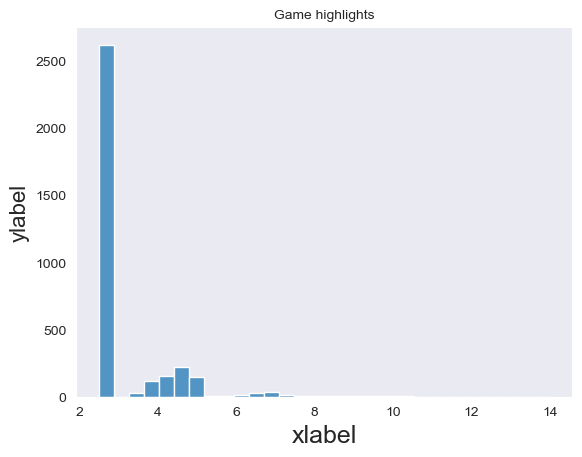

In [46]:
plt.title('Game highlights')
sns.histplot(time_interval_length, bins=30)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.show()

**Conclusion:** an interval last in average 3.05 secondes

In [47]:
df_with_dummies_gp['challenge_to_start'] = df_with_dummies_gp.challenge - df_with_dummies_gp.start
df_with_dummies_gp['challenge_to_end'] = df_with_dummies_gp.end - df_with_dummies_gp.challenge

In [48]:
challenge_starts = round((df_with_dummies_gp.describe()['challenge_to_end']['mean'] + df_with_dummies_gp.describe()['challenge_to_start']['mean'])/2,2)

In [49]:
challenge_starts

1.63

**Conclusion:** In average a challenge occurs 1.63 after the interval started 